In [103]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import glob
import cv2
import os 
from keras import Sequential
from keras.layers import Flatten,Dense,BatchNormalization,Dropout,LeakyReLU,GlobalAveragePooling2D
from keras.optimizers import Adam,RMSprop
from keras.losses import BinaryCrossentropy
from keras.applications import ResNet50V2, VGG19
from keras.callbacks import EarlyStopping
from keras import models
from keras.layers import Dropout, Flatten, Dense 
from keras.optimizers import SGD,Adam
from keras.models import load_model
from keras.utils import to_categorical 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import math 

import tools.visualizations as vis


In [2]:
train_path = "data/split2/train/"
test_path = "data/split2/test/"
val_path = "data/split2/val/"

In [3]:
cd ..

/Users/miafryer/Documents/flatiron/pneumonia_CT_scan


In [4]:
imgs_bacteria = [file for file in os.listdir(train_path+'BACTERIA') if file.endswith('.jpeg')]
len(imgs_bacteria)

1668

In [5]:
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_path, target_size=(64, 64), batch_size = 3514, class_mode='categorical') 

Found 3514 images belonging to 3 classes.


In [6]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_path, 
        target_size=(64, 64), 
        batch_size = 1171,
        class_mode='categorical') 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_path, 
        target_size=(64, 64),
        batch_size = 1171,
        class_mode='categorical')


Found 1171 images belonging to 3 classes.
Found 1171 images belonging to 3 classes.


In [7]:
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)

{'BACTERIA': 0, 'NORMAL': 1, 'VIRUS': 2}
{'BACTERIA': 0, 'NORMAL': 1, 'VIRUS': 2}
{'BACTERIA': 0, 'NORMAL': 1, 'VIRUS': 2}


In [8]:
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [ ]:
X_train = train_images.reshape((-1, 28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [9]:
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 3514
Number of testing samples: 1171
Number of validation samples: 1171
train_images shape: (3514, 64, 64, 3)
train_labels shape: (3514, 3)
test_images shape: (1171, 64, 64, 3)
test_labels shape: (1171, 3)
val_images shape: (1171, 64, 64, 3)
val_labels shape: (1171, 3)


In [10]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(3514, 12288)
(1171, 12288)
(1171, 12288)


In [13]:
#train_classes = train_generator.classes 
num_classes_train = len(train_generator.class_indices) 
#train_labels_cat = to_categorical(train_classes, num_classes=num_classes_train)

## Base Model

In [146]:
model1 = models.Sequential()
#model1.add(Flatten(input_shape=train_img.shape[1:])) 
model1.add(layers.Dense(20, activation='relu', input_shape=(12288,)))
model1.add(layers.Dense(7, activation='relu'))
model1.add(layers.Dense(5, activation='relu'))
model1.add(layers.Dense(num_classes_train, activation='softmax'))

model1.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['acc'])


In [147]:
history1 = model1.fit(train_img, train_labels, 
   epochs=10,
   batch_size=32, 
   validation_data=(val_img,val_labels))

Epoch 1/10
110/110 [==============================] - 1s 3ms/step - loss: 1.0617 - acc: 0.4639 - val_loss: 0.9238 - val_acc: 0.4748
Epoch 2/10
110/110 [==============================] - 0s 3ms/step - loss: 0.9228 - acc: 0.5590 - val_loss: 1.0297 - val_acc: 0.5149
Epoch 3/10
110/110 [==============================] - 0s 3ms/step - loss: 0.8462 - acc: 0.6106 - val_loss: 0.8363 - val_acc: 0.6106
Epoch 4/10
110/110 [==============================] - 0s 3ms/step - loss: 0.8094 - acc: 0.6307 - val_loss: 0.8562 - val_acc: 0.6336
Epoch 5/10
110/110 [==============================] - 0s 3ms/step - loss: 0.7620 - acc: 0.6598 - val_loss: 0.6793 - val_acc: 0.6857
Epoch 6/10
110/110 [==============================] - 0s 3ms/step - loss: 0.7044 - acc: 0.6784 - val_loss: 0.7072 - val_acc: 0.6755
Epoch 7/10
110/110 [==============================] - 0s 3ms/step - loss: 0.6955 - acc: 0.6832 - val_loss: 0.7355 - val_acc: 0.6601
Epoch 8/10
110/110 [==============================] - 0s 3ms/step - loss: 0.

In [148]:
model1.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 20)                245780    
_________________________________________________________________
dense_86 (Dense)             (None, 7)                 147       
_________________________________________________________________
dense_87 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_88 (Dense)             (None, 3)                 18        
Total params: 245,985
Trainable params: 245,985
Non-trainable params: 0
_________________________________________________________________


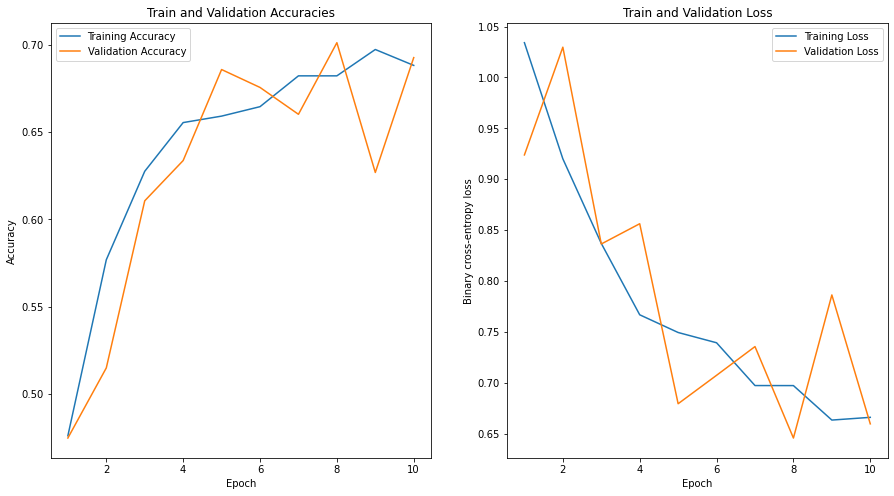

In [149]:
vis.plot_loss_accuracy(history1)
plt.show()

## Neural Network 2

In [138]:
mode2 = Sequential() 
#model1.add(Flatten(input_shape=(12288,))) 
model2.add(Flatten(input_shape=train_img.shape[1:])) 
model2.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model2.add(Dropout(0.5)) 
model2.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3))) 
model2.add(Dropout(0.3)) 
model2.add(Dense(num_classes_train, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
   optimizer=optimizers.RMSprop(lr=1e-4),
   metrics=['acc'])

In [139]:
history2 = model2.fit(train_img, train_labels, 
   epochs=10,
   batch_size=32, 
   validation_data=(val_img , val_labels))

Epoch 1/10
110/110 [==============================] - 1s 4ms/step - loss: 1.0466 - acc: 0.5010 - val_loss: 0.9639 - val_acc: 0.6985
Epoch 2/10
110/110 [==============================] - 0s 4ms/step - loss: 0.9475 - acc: 0.6436 - val_loss: 0.8768 - val_acc: 0.6849
Epoch 3/10
110/110 [==============================] - 0s 4ms/step - loss: 0.8584 - acc: 0.7026 - val_loss: 0.7927 - val_acc: 0.6985
Epoch 4/10
110/110 [==============================] - 0s 3ms/step - loss: 0.7930 - acc: 0.7056 - val_loss: 0.7401 - val_acc: 0.6985
Epoch 5/10
110/110 [==============================] - 0s 3ms/step - loss: 0.7292 - acc: 0.7137 - val_loss: 0.7074 - val_acc: 0.6994
Epoch 6/10
110/110 [==============================] - 0s 4ms/step - loss: 0.7201 - acc: 0.6927 - val_loss: 0.6904 - val_acc: 0.7003
Epoch 7/10
110/110 [==============================] - 0s 4ms/step - loss: 0.7020 - acc: 0.7017 - val_loss: 0.6871 - val_acc: 0.6960
Epoch 8/10
110/110 [==============================] - 0s 4ms/step - loss: 0.

In [140]:
(eval_loss, eval_accuracy) = model2.evaluate( 
    test_img , test_labels, batch_size=50, verbose=1)

24/24 [==============================] - 0s 2ms/step - loss: 0.6853 - acc: 0.6951


In [141]:
y_hat_test = model2.predict(test_img) 

In [142]:
categorical_test_labels = pd.DataFrame(test_labels,columns= ('BACTERIA', 'NORMAL', 'VIRUS')).idxmax(axis=1)
categorical_preds = pd.DataFrame(y_hat_test,columns= ('BACTERIA', 'NORMAL', 'VIRUS')).idxmax(axis=1)

<AxesSubplot:>

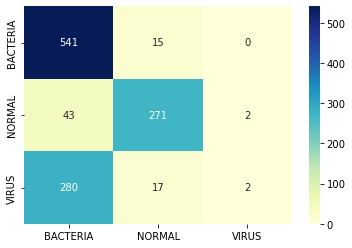

In [143]:
cnf_matrix = confusion_matrix(categorical_test_labels,categorical_preds,labels=['BACTERIA', 'NORMAL' ,'VIRUS'] )
sns.heatmap(cnf_matrix , annot=True, fmt="d",cmap="YlGnBu",xticklabels=['BACTERIA', 'NORMAL' ,'VIRUS'], yticklabels=['BACTERIA', 'NORMAL' ,'VIRUS'])

In [144]:
classification_metrics= classification_report(categorical_test_labels,categorical_preds, target_names=['BACTERIA', 'NORMAL' ,'VIRUS'])
print(classification_metrics)

              precision    recall  f1-score   support

    BACTERIA       0.63      0.97      0.76       556
      NORMAL       0.89      0.86      0.88       316
       VIRUS       0.50      0.01      0.01       299

    accuracy                           0.70      1171
   macro avg       0.67      0.61      0.55      1171
weighted avg       0.67      0.70      0.60      1171



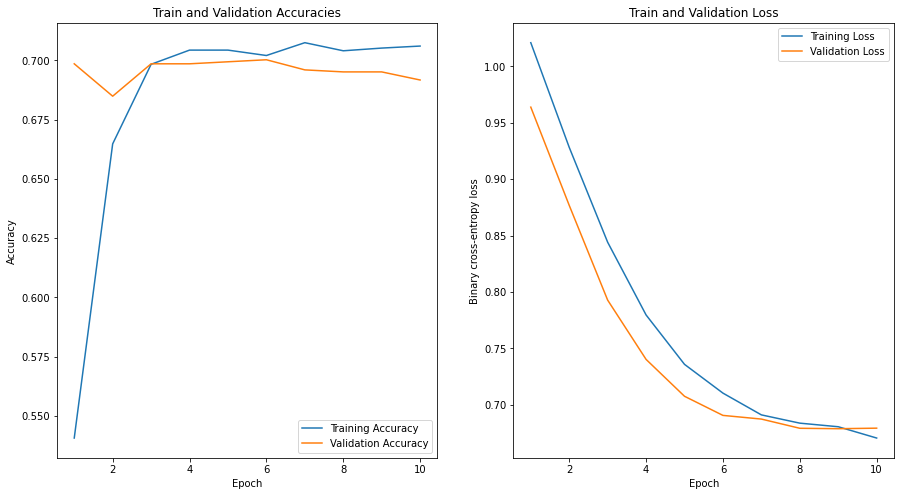

In [145]:
vis.plot_loss_accuracy(history2)
plt.show()

## CNN 1

In [155]:
data = train_img.reshape(3514,64,64,3)
data_val = val_img.reshape(1171,64,64,3)
data_test = test_img.reshape(1171,64,64,3)

In [134]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(32, (4, 4), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(num_classes_train, activation='softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [135]:
history3 = model3.fit(data, train_labels, 
   epochs=10,
   batch_size=32, 
   validation_data=(data_val, val_labels))

Epoch 1/10
110/110 [==============================] - 7s 61ms/step - loss: 1.0589 - acc: 0.4718 - val_loss: 1.0353 - val_acc: 0.4833
Epoch 2/10
110/110 [==============================] - 7s 61ms/step - loss: 1.0276 - acc: 0.4890 - val_loss: 0.9647 - val_acc: 0.6328
Epoch 3/10
110/110 [==============================] - 7s 60ms/step - loss: 0.9446 - acc: 0.5853 - val_loss: 0.8712 - val_acc: 0.5867
Epoch 4/10
110/110 [==============================] - 6s 59ms/step - loss: 0.8586 - acc: 0.6144 - val_loss: 0.7515 - val_acc: 0.6960
Epoch 5/10
110/110 [==============================] - 6s 59ms/step - loss: 0.7749 - acc: 0.6594 - val_loss: 0.7771 - val_acc: 0.6558
Epoch 6/10
110/110 [==============================] - 7s 62ms/step - loss: 0.6989 - acc: 0.6937 - val_loss: 0.6419 - val_acc: 0.7293
Epoch 7/10
110/110 [==============================] - 7s 62ms/step - loss: 0.6407 - acc: 0.7147 - val_loss: 0.5992 - val_acc: 0.7404
Epoch 8/10
110/110 [==============================] - 7s 60ms/step - 

In [156]:
(eval_loss, eval_accuracy) = model3.evaluate( 
    data_test , test_labels, batch_size=50, verbose=1)

24/24 [==============================] - 1s 24ms/step - loss: 0.5767 - acc: 0.7515


In [157]:
y_hat_test3 = model3.predict(data_test) 

In [158]:
categorical_test_labels = pd.DataFrame(test_labels,columns= ('BACTERIA', 'NORMAL', 'VIRUS')).idxmax(axis=1)
categorical_preds3 = pd.DataFrame(y_hat_test3,columns= ('BACTERIA', 'NORMAL', 'VIRUS')).idxmax(axis=1)

<AxesSubplot:>

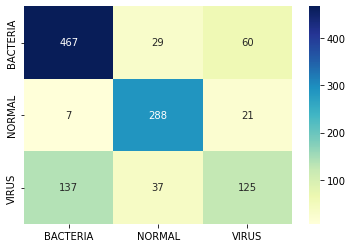

In [159]:
cnf_matrix = confusion_matrix(categorical_test_labels,categorical_preds3,labels=['BACTERIA', 'NORMAL' ,'VIRUS'] )
sns.heatmap(cnf_matrix , annot=True, fmt="d",cmap="YlGnBu",xticklabels=['BACTERIA', 'NORMAL' ,'VIRUS'], yticklabels=['BACTERIA', 'NORMAL' ,'VIRUS'])

In [160]:
classification_metrics= classification_report(categorical_test_labels,categorical_preds3, target_names=['BACTERIA', 'NORMAL' ,'VIRUS'])
print(classification_metrics)

              precision    recall  f1-score   support

    BACTERIA       0.76      0.84      0.80       556
      NORMAL       0.81      0.91      0.86       316
       VIRUS       0.61      0.42      0.50       299

    accuracy                           0.75      1171
   macro avg       0.73      0.72      0.72      1171
weighted avg       0.74      0.75      0.74      1171



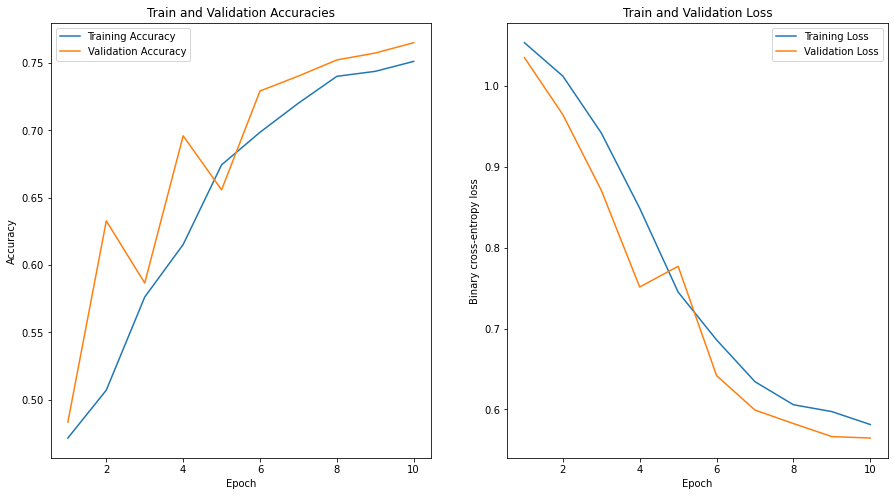

In [137]:
vis.plot_loss_accuracy(history3)
plt.show()

## CNN 2

In [127]:
model4= models.Sequential()
model4.add(layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model4.add(layers.MaxPool2D(pool_size=2, strides=2))
model4.add(layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
model4.add(layers.MaxPool2D(pool_size=2, strides=2))
model4.add(layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model4.add(layers.MaxPool2D(pool_size=2, strides=2))
model4.add(layers.Flatten())
model4.add(layers.Dense(128, activation='relu'))
model4.add(layers.Dense(64, activation='relu'))
model4.add(layers.Dense(3, activation='softmax'))

# finally compile and train the cnn
model4.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['acc'])

In [128]:
history4 = model4.fit(data, train_labels, 
   epochs=10,
   batch_size=32, 
   validation_data=(data_val, val_labels))

Epoch 1/10
36/36 [==============================] - 8s 212ms/step - loss: 1.0395 - acc: 0.4835 - val_loss: 0.7389 - val_acc: 0.6874
Epoch 2/10
36/36 [==============================] - 8s 214ms/step - loss: 0.7685 - acc: 0.6514 - val_loss: 0.6408 - val_acc: 0.7344
Epoch 3/10
36/36 [==============================] - 8s 210ms/step - loss: 0.6277 - acc: 0.7281 - val_loss: 0.6383 - val_acc: 0.6960
Epoch 4/10
36/36 [==============================] - 8s 210ms/step - loss: 0.6098 - acc: 0.7242 - val_loss: 0.6531 - val_acc: 0.7464
Epoch 5/10
36/36 [==============================] - 8s 216ms/step - loss: 0.6325 - acc: 0.7401 - val_loss: 0.5402 - val_acc: 0.7839
Epoch 6/10
36/36 [==============================] - 8s 214ms/step - loss: 0.5335 - acc: 0.7628 - val_loss: 0.5429 - val_acc: 0.7814
Epoch 7/10
36/36 [==============================] - 8s 215ms/step - loss: 0.5260 - acc: 0.7725 - val_loss: 0.5249 - val_acc: 0.7933
Epoch 8/10
36/36 [==============================] - 8s 214ms/step - loss: 0.

In [156]:
(eval_loss, eval_accuracy) = model4.evaluate( 
    data_test , test_labels, batch_size=50, verbose=1)

24/24 [==============================] - 1s 24ms/step - loss: 0.5767 - acc: 0.7515


In [157]:
y_hat_test4 = model4.predict(data_test) 

In [158]:
categorical_test_labels = pd.DataFrame(test_labels,columns= ('BACTERIA', 'NORMAL', 'VIRUS')).idxmax(axis=1)
categorical_preds3 = pd.DataFrame(y_hat_test4,columns= ('BACTERIA', 'NORMAL', 'VIRUS')).idxmax(axis=1)

<AxesSubplot:>

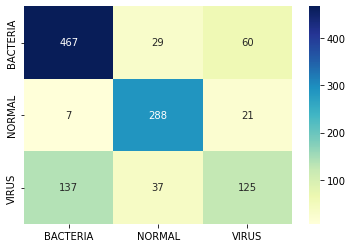

In [159]:
cnf_matrix = confusion_matrix(categorical_test_labels,categorical_preds4,labels=['BACTERIA', 'NORMAL' ,'VIRUS'] )
sns.heatmap(cnf_matrix , annot=True, fmt="d",cmap="YlGnBu",xticklabels=['BACTERIA', 'NORMAL' ,'VIRUS'], yticklabels=['BACTERIA', 'NORMAL' ,'VIRUS'])

In [160]:
classification_metrics= classification_report(categorical_test_labels,categorical_preds3, target_names=['BACTERIA', 'NORMAL' ,'VIRUS'])
print(classification_metrics)

              precision    recall  f1-score   support

    BACTERIA       0.76      0.84      0.80       556
      NORMAL       0.81      0.91      0.86       316
       VIRUS       0.61      0.42      0.50       299

    accuracy                           0.75      1171
   macro avg       0.73      0.72      0.72      1171
weighted avg       0.74      0.75      0.74      1171



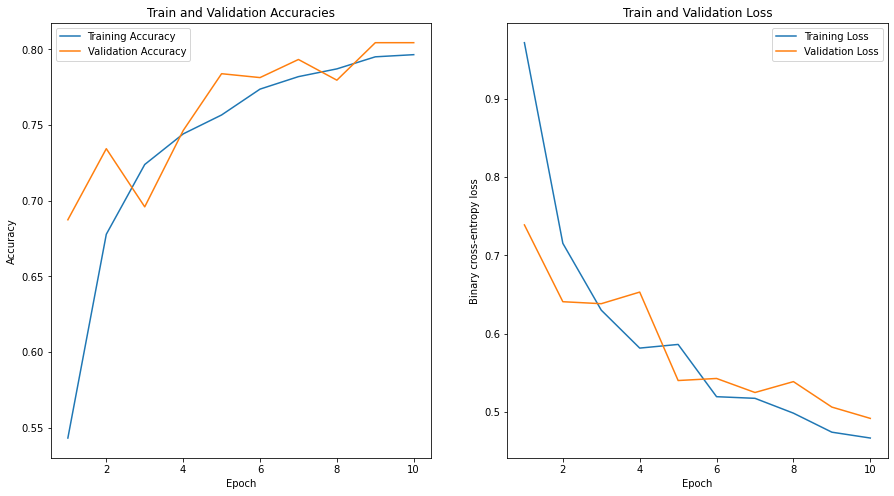

In [129]:
vis.plot_loss_accuracy(history4)
plt.show()

## Trasnfer learning VGG19

In [161]:
base_model = VGG19(include_top = False, weights = 'imagenet', input_shape = (64,64,3), classes = train_labels.shape[1])
model5= models.Sequential()
model5.add(base_model) 
model5.add(Flatten()) 
model5.add(Dense(1024,activation=('relu')))
model5.add(Dense(512,activation=('relu'))) 
model5.add(Dense(256,activation=('relu'))) 
model5.add(Dropout(.3))
#model.add(Dropout(.2))
model5.add(Dense(3,activation=('softmax'))) 

In [162]:
model5.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 2, 2, 512)         20024384  
_________________________________________________________________
flatten_20 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_93 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_94 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_95 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_96 (Dense)             (None, 3)               

In [163]:
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model5.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['acc'])

In [164]:
base_model.trainable = False

# You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute
for layer in model5.layers:
    print(layer.name, layer.trainable)
    
# Similarly, we can check how many trainable weights are in the model 
print(len(model5.trainable_weights))

vgg19 False
flatten_20 True
dense_93 True
dense_94 True
dense_95 True
dropout_12 True
dense_96 True
8


In [166]:
history5 = model5.fit(data, train_labels, 
   epochs=10,
   batch_size=32, 
   validation_data=(data_val, val_labels))

Epoch 1/10
110/110 [==============================] - 493s 4s/step - loss: 0.4958 - acc: 0.7917 - val_loss: 0.4843 - val_acc: 0.7976
Epoch 2/10
110/110 [==============================] - 460s 4s/step - loss: 0.4407 - acc: 0.8210 - val_loss: 0.4804 - val_acc: 0.8164
Epoch 3/10
110/110 [==============================] - 454s 4s/step - loss: 0.4265 - acc: 0.8233 - val_loss: 0.4795 - val_acc: 0.8087
Epoch 4/10
110/110 [==============================] - 550s 5s/step - loss: 0.3972 - acc: 0.8330 - val_loss: 0.4356 - val_acc: 0.8275
Epoch 5/10
 50/110 [============>.................] - ETA: 3:50 - loss: 0.3678 - acc: 0.8487

KeyboardInterrupt: 

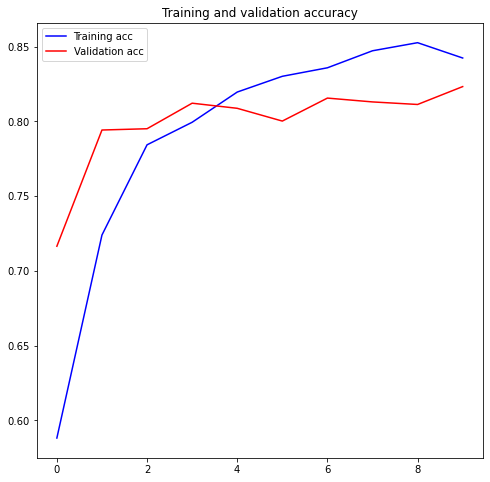

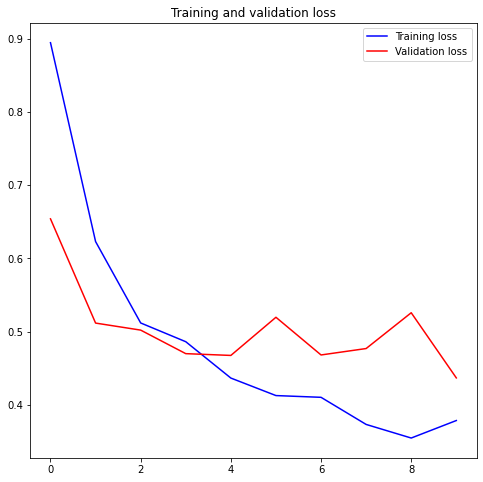

In [125]:
vis.plot_loss_accuracy(history5)
plt.show()

In [ ]:
cnf_matrix = confusion_matrix(categorical_test_labels,categorical_preds,labels=['BACTERIA', 'NORMAL' ,'VIRUS'] )
sns.heatmap(cnf_matrix , annot=True, fmt="d",cmap="YlGnBu",xticklabels=['BACTERIA', 'NORMAL' ,'VIRUS'], yticklabels=['BACTERIA', 'NORMAL' ,'VIRUS'])
